# i. Perkenalan


> Bab pengenalan diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.


Nama : Stanly  
Batch : RMT_36

Dataset : FIFA 2022

Problem statement:  
Menurut [laporan FIFA 2021](https://publications.fifa.com/en/annual-report-2021/around-fifa/professional-football-2021) jumlah pemain sepakbole tahun 2021 kurang lebih 130.000 pemain. Namun dalam dataset ini hanya terdapat 20.000 pemain.

Objective:  
Project ini bertujuan untuk memprediksi rating pemain FIFA 2022 sehingga semua pemain sepakbole profesional dapat diketahui ratingnya dan tidak menutup kemungkinan untuk lahirnya talenta baru.


# ii. Import Libraries


> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# iii. Data Loading


> Bagian ini berisi proses penyimpanan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.


In [2]:
df_ori = pd.read_csv("machine_learning_problem_framing.csv")

df = df_ori.copy()

df

,Name,Age,Height,Weight,ValueEUR,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Overall
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


Saya ingin mengganti nama kolom `ValueEUR` dengan `Price`, dan `Overall` menjadi `Rating` menggunakan sintaks `.rename()`


In [3]:
df.rename(columns={'ValueEUR': 'Price', 'Overall': 'Rating'}, inplace=True)
df

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19260 non-null  object
 1   Age                19260 non-null  int64 
 2   Height             19260 non-null  int64 
 3   Weight             19260 non-null  int64 
 4   Price              19260 non-null  int64 
 5   AttackingWorkRate  19260 non-null  object
 6   DefensiveWorkRate  19260 non-null  object
 7   PaceTotal          19260 non-null  int64 
 8   ShootingTotal      19260 non-null  int64 
 9   PassingTotal       19260 non-null  int64 
 10  DribblingTotal     19260 non-null  int64 
 11  DefendingTotal     19260 non-null  int64 
 12  PhysicalityTotal   19260 non-null  int64 
 13  Rating             19260 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.1+ MB


Statement? .. baris ... kolom, ada nan?, tipe data nya sudah sesuai?

numerical column = ['Age', 'Height', dll]  
categorical nominal = ['Name']  
categorical ordinal = ['AttackingWorkRate', 'DefensiveWorkRate']  
categorical encoded = ['Gender']


In [5]:
# Check dataset 2
df.describe()

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
count,19260.000000,19260.000000,19260.000000,1.926000e+04,19260.000000,19260.000000,19260.000000,19260.000000,19260.0000,19260.000000,19260.000000
mean,25.184683,181.305036,74.950779,2.857652e+06,67.910228,53.535514,57.853323,63.028712,50.0581,64.676584,65.815628
std,4.737340,6.866151,7.066864,7.604532e+06,10.656453,13.813476,9.835494,9.704853,16.3888,9.626269,6.817297
min,16.000000,155.000000,49.000000,0.000000e+00,28.000000,18.000000,25.000000,26.000000,14.0000,29.000000,48.000000
25%,21.000000,176.000000,70.000000,4.750000e+05,62.000000,44.000000,52.000000,58.000000,35.0000,58.000000,62.000000
50%,25.000000,181.000000,75.000000,9.750000e+05,68.000000,56.000000,58.000000,64.000000,54.0000,66.000000,66.000000
75%,29.000000,186.000000,80.000000,2.000000e+06,75.000000,64.000000,65.000000,69.000000,63.0000,72.000000,70.000000
max,54.000000,206.000000,110.000000,1.940000e+08,97.000000,94.000000,93.000000,95.000000,91.0000,92.000000,93.000000


Statement?


In [6]:
df.duplicated().sum()

104

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

# iv. Exploratory Data Analysis (EDA)


> Bagian ini berisi eksplorasi data pada dataset di atas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.


Objective 1: Ingin melihat persebaran rating pada dataset dan juga ingin melihat proporsi antara berat badan dan tinggi badan.


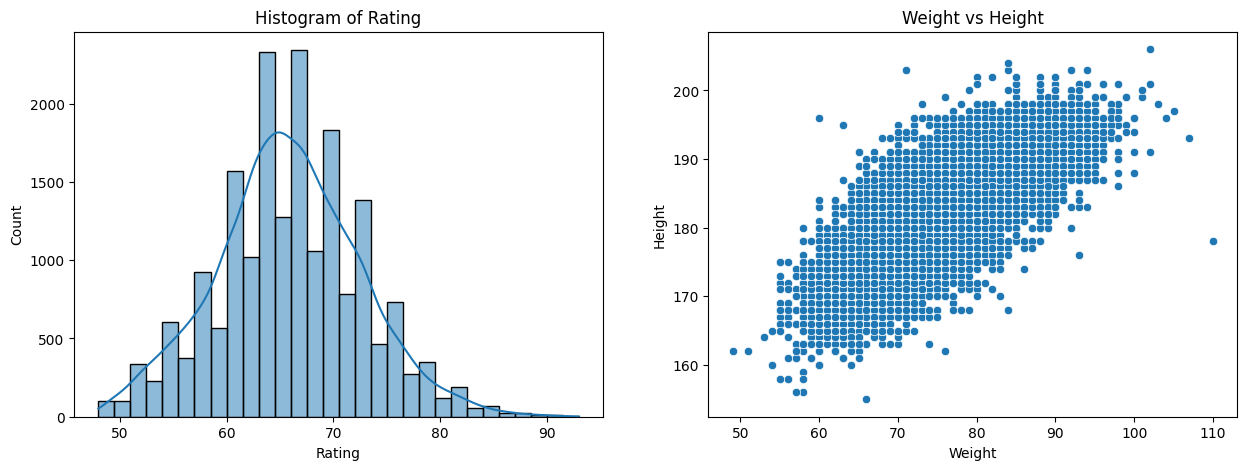

In [9]:
# Create Histogram and scatter plot

# Create canvas
plt.figure(figsize=(15,5))

# Plot 1 taruh kiri
plt.subplot(1,2,1)
sns.histplot(df.Rating, kde=True, bins=30)
plt.title('Histogram of Rating')

# Plot 2 taruh kanan
plt.subplot(1,2,2)
sns.scatterplot(x='Weight', y='Height', data=df)
plt.title('Weight vs Height')

plt.show()

Statement?


# v. Feature Engineering


> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train dan test, transformasi data(normalisasi, encoding, dll) dan proses-proses yang dibutuhkan.


## Split X (features) dan y (target)


In [10]:
# Split between X and y
X = df.drop(['Rating'], axis=1)
y = df.Rating

In [11]:
X.head()

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90


In [12]:
y.head()

0    93
1    92
2    91
3    91
4    91
Name: Rating, dtype: int64

## Split between Train and Test


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=107)

print('train size:', X_train.shape)
print('test size:', X_test.shape)
print(X_train)

train size: (15324, 13)
test size: (3832, 13)
                Name  Age  Height  Weight     Price AttackingWorkRate  \
12229   K. Shiihashi   24     178      70    775000            Medium   
13158        Ke Zhao   32     175      70    325000              High   
7959     R. Strieder   28     174      68    900000            Medium   
498      Joan Jordán   26     183      74  24500000            Medium   
9306        M. Thiam   26     180      85   1000000            Medium   
...              ...  ...     ...     ...       ...               ...   
10935        C. Boli   22     175      65   1100000              High   
1518   R. Mandragora   24     183      75   9000000            Medium   
6902      D. Ballard   21     187      85   2500000            Medium   
4654       R. Assalé   27     167      65   1700000              High   
2214   Rubén Sobrino   29     185      73   4200000              High   

      DefensiveWorkRate  PaceTotal  ShootingTotal  PassingTotal  \
12229     

## Handling Outlier


Saya skip, akan dijelaskan lebih lanjut di hari Rabu


## Missing Value


In [14]:
# Xtrain cek
X_train.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [15]:
# X_test cek
X_test.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [16]:
# y_train cek
y_train.isnull().sum()

0

In [17]:
# y_test cek
y_test.isnull().sum()

0

Statement?


# Feature Selection


Untuk membantu memeriksa korelasi target dengan features di GC baik categorical maupun numerical, bisa pakai [phik_corr](https://phik.readthedocs.io/en/latest/phik.html). Jangan lupa untuk di concat X_train dengan y_train simpan dalam variable sementara.


In [18]:
df.shape[0]

19156

In [19]:
# cek feature name apakah primary key
df.Name.shape[0] == df.shape[0]

True

Di project FIFA ini saya tidak akan cek korelasi, namun saya sudah cek bahwa nama itu adalah primary key, jadi bisa didrop saja


In [20]:
# drop Name
X_train.drop(columns=['Name'], inplace=True)
X_test.drop(columns=['Name'], inplace=True)

print(X_train.columns)
print(X_test.columns)

Index(['Age', 'Height', 'Weight', 'Price', 'AttackingWorkRate',
       'DefensiveWorkRate', 'PaceTotal', 'ShootingTotal', 'PassingTotal',
       'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal'],
      dtype='object')
Index(['Age', 'Height', 'Weight', 'Price', 'AttackingWorkRate',
       'DefensiveWorkRate', 'PaceTotal', 'ShootingTotal', 'PassingTotal',
       'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal'],
      dtype='object')


# Cardinality Check


Memeriksa unique value di categorical columns. Di bahas lebih detail hari Rabu.


### Split between numerical and categorical columns for scaling and encoding


In [21]:
num_col = ['Age', 'Height', 'Weight', 'Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal',
       'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
num_col_cara2 = X_train.select_dtypes(include=np.number).columns.tolist()
cat_col = ['AttackingWorkRate', 'DefensiveWorkRate']
cat_col_cara2 = X_train.select_dtypes(exclude=np.number).columns.tolist()

print(f'numerical: {num_col}')
print(f'numerical: {num_col_cara2}')
print(f'categorical: {cat_col}')
print(f'categorical: {cat_col_cara2}')

numerical: ['Age', 'Height', 'Weight', 'Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
numerical: ['Age', 'Height', 'Weight', 'Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
categorical: ['AttackingWorkRate', 'DefensiveWorkRate']
categorical: ['AttackingWorkRate', 'DefensiveWorkRate']


Next kita define num col untuk X_train, X_test dan cat col untuk X_train, X_test


In [22]:
# define new X_train and X_test
X_train_num = X_train[num_col]
X_test_num = X_test[num_col]
X_train_cat = X_train[cat_col]
X_test_cat = X_test[cat_col]

In [23]:
X_train_num.head()

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
12229,24,178,70,775000,58,33,57,58,61,71
13158,32,175,70,325000,57,30,48,56,60,75
7959,28,174,68,900000,38,41,64,64,65,64
498,26,183,74,24500000,63,75,81,77,67,76
9306,26,180,85,1000000,80,62,60,69,46,72


## Feature Scaling


$WhyNeedScaling??$


In [24]:
X_train.describe()

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
count,15324.000000,15324.000000,15324.000000,1.532400e+04,15324.000000,15324.000000,15324.000000,15324.000000,15324.000000,15324.000000
mean,25.180827,181.338554,74.996346,2.854338e+06,67.853237,53.488058,57.788371,62.976964,50.073088,64.669930
std,4.737527,6.847180,7.045187,7.742916e+06,10.659145,13.788060,9.831653,9.665275,16.373193,9.619806
min,16.000000,155.000000,49.000000,0.000000e+00,28.000000,18.000000,25.000000,26.000000,14.000000,29.000000
25%,21.000000,176.000000,70.000000,4.750000e+05,62.000000,44.000000,51.750000,58.000000,35.000000,58.000000
50%,25.000000,181.000000,75.000000,9.750000e+05,68.000000,56.000000,58.000000,64.000000,54.000000,66.000000
75%,29.000000,186.000000,80.000000,2.000000e+06,75.000000,64.000000,64.000000,69.000000,63.000000,72.000000
max,43.000000,206.000000,110.000000,1.940000e+08,97.000000,94.000000,93.000000,92.000000,91.000000,92.000000


Kalo dilihat digit nya Price (max di 8 digit) vs Age (max di 2 digit), nanti model akan 'rasis'. Dia akan ignore age, dan lebih mempelajari yang digit gede -> Price


Narasikan mengapa menggunakan metode scaling MinMaxScaler


In [25]:
# import library
from sklearn.preprocessing import MinMaxScaler

# define scaling method
scaler = MinMaxScaler()
scaler.fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

## Feature Encoding


Jangan lupa jelaskan mengapa menggunakan metode encode ini..


In [26]:
# Cek unique values from Attacking Work Rate
X_train_cat.AttackingWorkRate.unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [27]:
# Cek unique values from Defensive Work Rate
X_train_cat.DefensiveWorkRate.unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [28]:
# Cek urutan kolom, attack duluan atau defense duluan
X_train_cat.head()

,AttackingWorkRate,DefensiveWorkRate
12229,Medium,High
13158,High,Medium
7959,Medium,Medium
498,Medium,Medium
9306,Medium,Medium


Attack duluan, jadi define untuk urutan attack dulu baru defense. Beruntungnya value dari attack dengan defense sama Low Medium High.


In [29]:
# import library
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High'], # Untuk col 1
                                    ['Low', 'Medium', 'High']]) # Untuk col 2
encoder.fit(X_train_cat)
X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

In [30]:
X_train_cat_encoded
print(len(X_train_cat_encoded))
print(len(X_train_num_scaled))

15324
15324


## Concat between numerical and categorical


In [31]:
# Concat
X_train_final = np.concatenate([X_train_cat_encoded, X_train_num_scaled], axis=1)
X_test_final = np.concatenate([X_test_cat_encoded, X_test_num_scaled], axis=1)
X_train_final

array([[1.        , 2.        , 0.2962963 , ..., 0.48484848, 0.61038961,
        0.66666667],
       [2.        , 1.        , 0.59259259, ..., 0.45454545, 0.5974026 ,
        0.73015873],
       [1.        , 1.        , 0.44444444, ..., 0.57575758, 0.66233766,
        0.55555556],
       ...,
       [1.        , 1.        , 0.18518519, ..., 0.34848485, 0.68831169,
        0.65079365],
       [2.        , 1.        , 0.40740741, ..., 0.72727273, 0.19480519,
        0.3968254 ],
       [2.        , 1.        , 0.48148148, ..., 0.6969697 , 0.2987013 ,
        0.58730159]])

# vi. Model Definition


> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.


notes:

1. Algoritma yang dipakai `LinearRegression`

- alasannya?

2. Metrics yang dipakai `MeanAbsoluteError`

- alasannya?


In [32]:
# import library
from sklearn.linear_model import LinearRegression

# define model
model_linear = LinearRegression()

# vii. Model Training


> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.


In [33]:
# Train the model
model_linear.fit(X_train_final, y_train)

LinearRegression()

# viii. Model Evaluation


> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih.
> Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisanya.


In [34]:
# Predict Train and test

y_pred_train = model_linear.predict(X_train_final)
y_pred_test = model_linear.predict(X_test_final)

print(y_pred_train)
print(y_pred_test)

[64.1819511  65.33718112 65.78948878 ... 61.98075371 65.87872768
 69.86210281]
[68.68292366 65.9403866  70.45832068 ... 60.27983339 76.76323054
 63.34279435]


In [35]:
y_train

12229    64
13158    63
7959     67
498      80
9306     66
         ..
10935    65
1518     75
6902     68
4654     70
2214     74
Name: Rating, Length: 15324, dtype: int64

In [36]:
# import library
from sklearn.metrics import mean_absolute_error

# Evaluate the model
print('Error - train:', mean_absolute_error(y_train, y_pred_train))
print('Error - test:', mean_absolute_error(y_test, y_pred_test))

Error - train: 2.3463728409258384
Error - test: 2.3639790047020868


Contoh analisa untuk data train kedua. Diprediksi nya Rating = 65.33 berarti maksud dari error train 2.34 dia + - dari predict. Artinya prediksi bisa meleset menjadi 62.98 sampai dengan 67.67. Terbukti dari y_train nya yang data kedua itu Rating = 63.


Statement?

Modelnya under/over/goodfit?

Kelebihan model, **bisa** memprediksi data seperti apa?

Kelemahan model, **gagal** memprediksi data seperti apa?


# Model Inference dibuat dalam notebook yang berbeda, beri nama ...\_inf.ipynb


# ix. Model Saving for Inference


> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.


In [37]:
import pickle
import json

# Save the files!

with open('model_linear.pkl', 'wb') as file_1: # wb = write binary
  pickle.dump(model_linear, file_1)

with open('model_scaler.pkl', 'wb') as file_2: # wb = write binary
  pickle.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  pickle.dump(encoder, file_3)

with open('num_col.txt', 'w') as file_4:
  json.dump(num_col, file_4)

with open('cat_col.txt', 'w') as file_5:
  json.dump(cat_col, file_5)

# x. Conclusion


- Business insight from EDA
- Further improvement
- Answer from Objective
- FE Model eval, tuning, dll


In [38]:
df_ori.columns

Index(['Name', 'Age', 'Height', 'Weight', 'ValueEUR', 'AttackingWorkRate',
       'DefensiveWorkRate', 'PaceTotal', 'ShootingTotal', 'PassingTotal',
       'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal', 'Overall'],
      dtype='object')